<a href="https://colab.research.google.com/github/gabriellavinco/PenaltyKickPrediction/blob/main/YOLOv8ModelCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **START GPU**

In [1]:
!nvidia-smi


Wed Feb  1 06:53:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **IMPORT DEPENDENCIES**

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# install ultralytics package
# !pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.1/271.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZVnQlngkVhiJ45OYIeX2")
project = rf.workspace("thesis-pk").project("penalty-kick-pxuv9")
dataset = project.version(2).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=7317852424ca5f187160d0784a2dd7b757e806ec805763ae243c3e242c5cfd85
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.25, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to penalty-kick-2 in yolov8:: 100%|██████████| 346/346 [00:00<00:00, 1607.03it/s]


# **TRAIN**

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/penalty-kick-2/data.yaml epochs=25 imgsz=800

/content
Ultralytics YOLOv8.0.25 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/penalty-kick-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, op

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


# **CHECK TRAINING ANALYTICS**

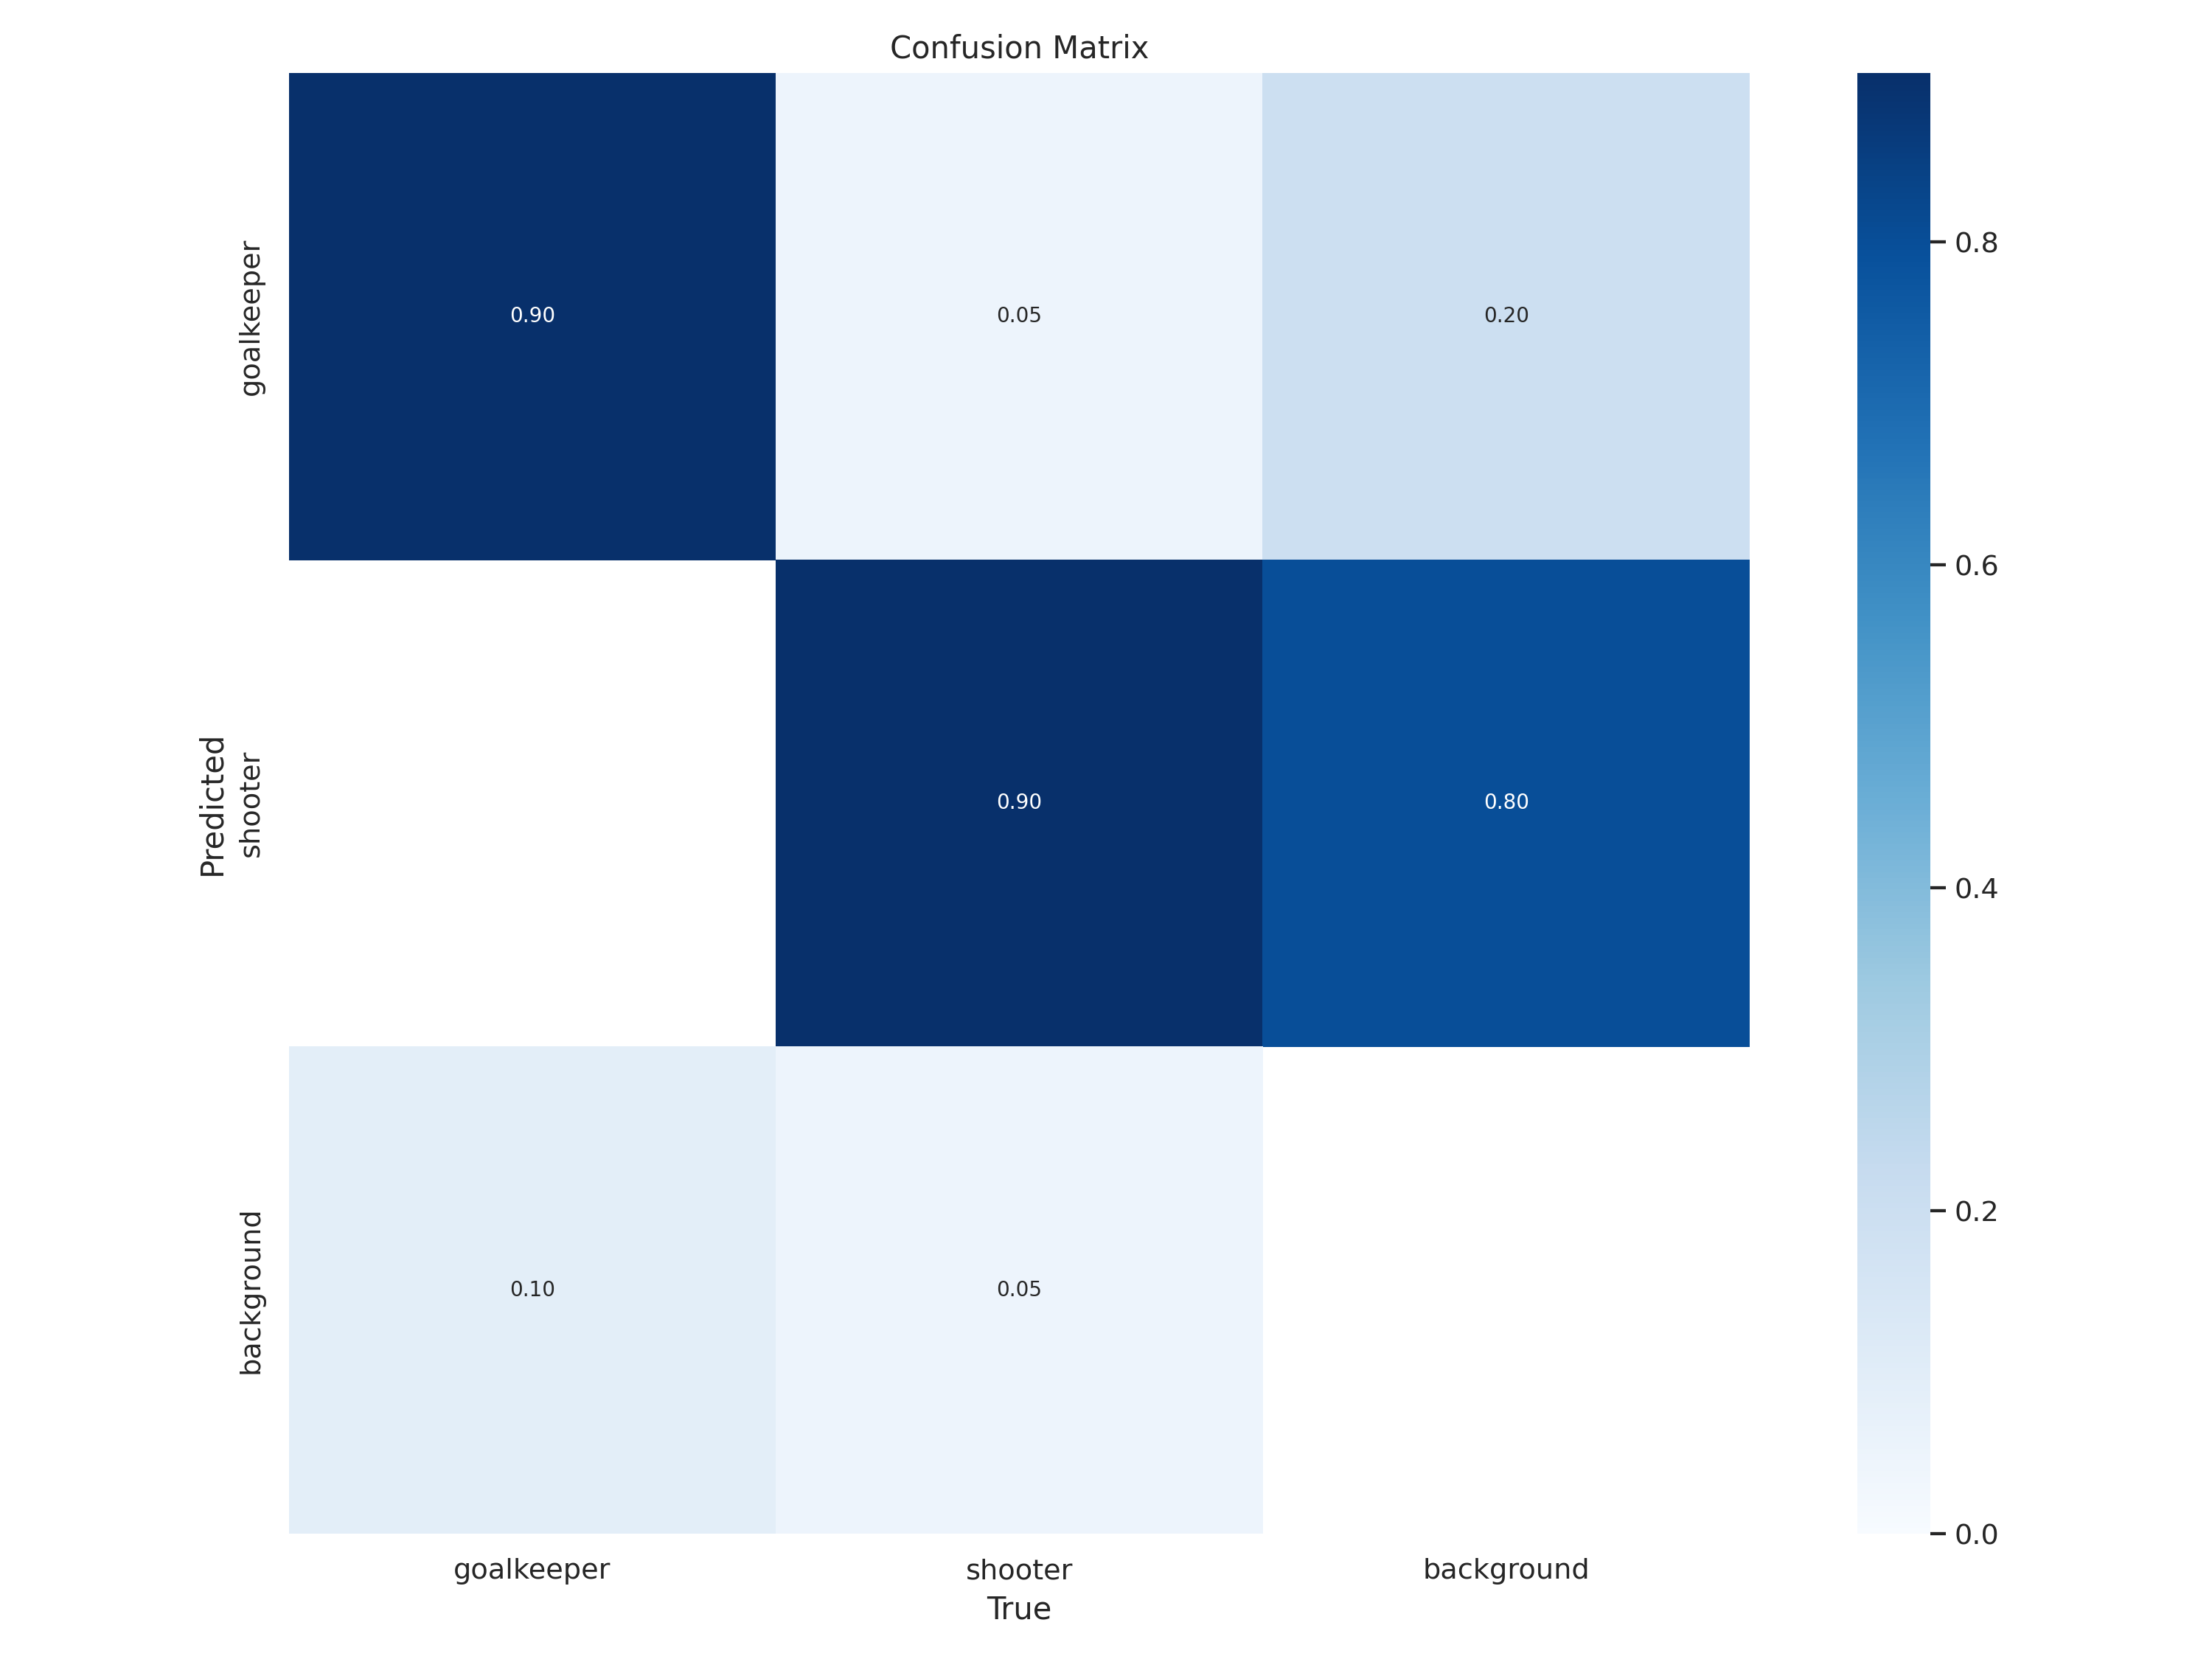

In [13]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

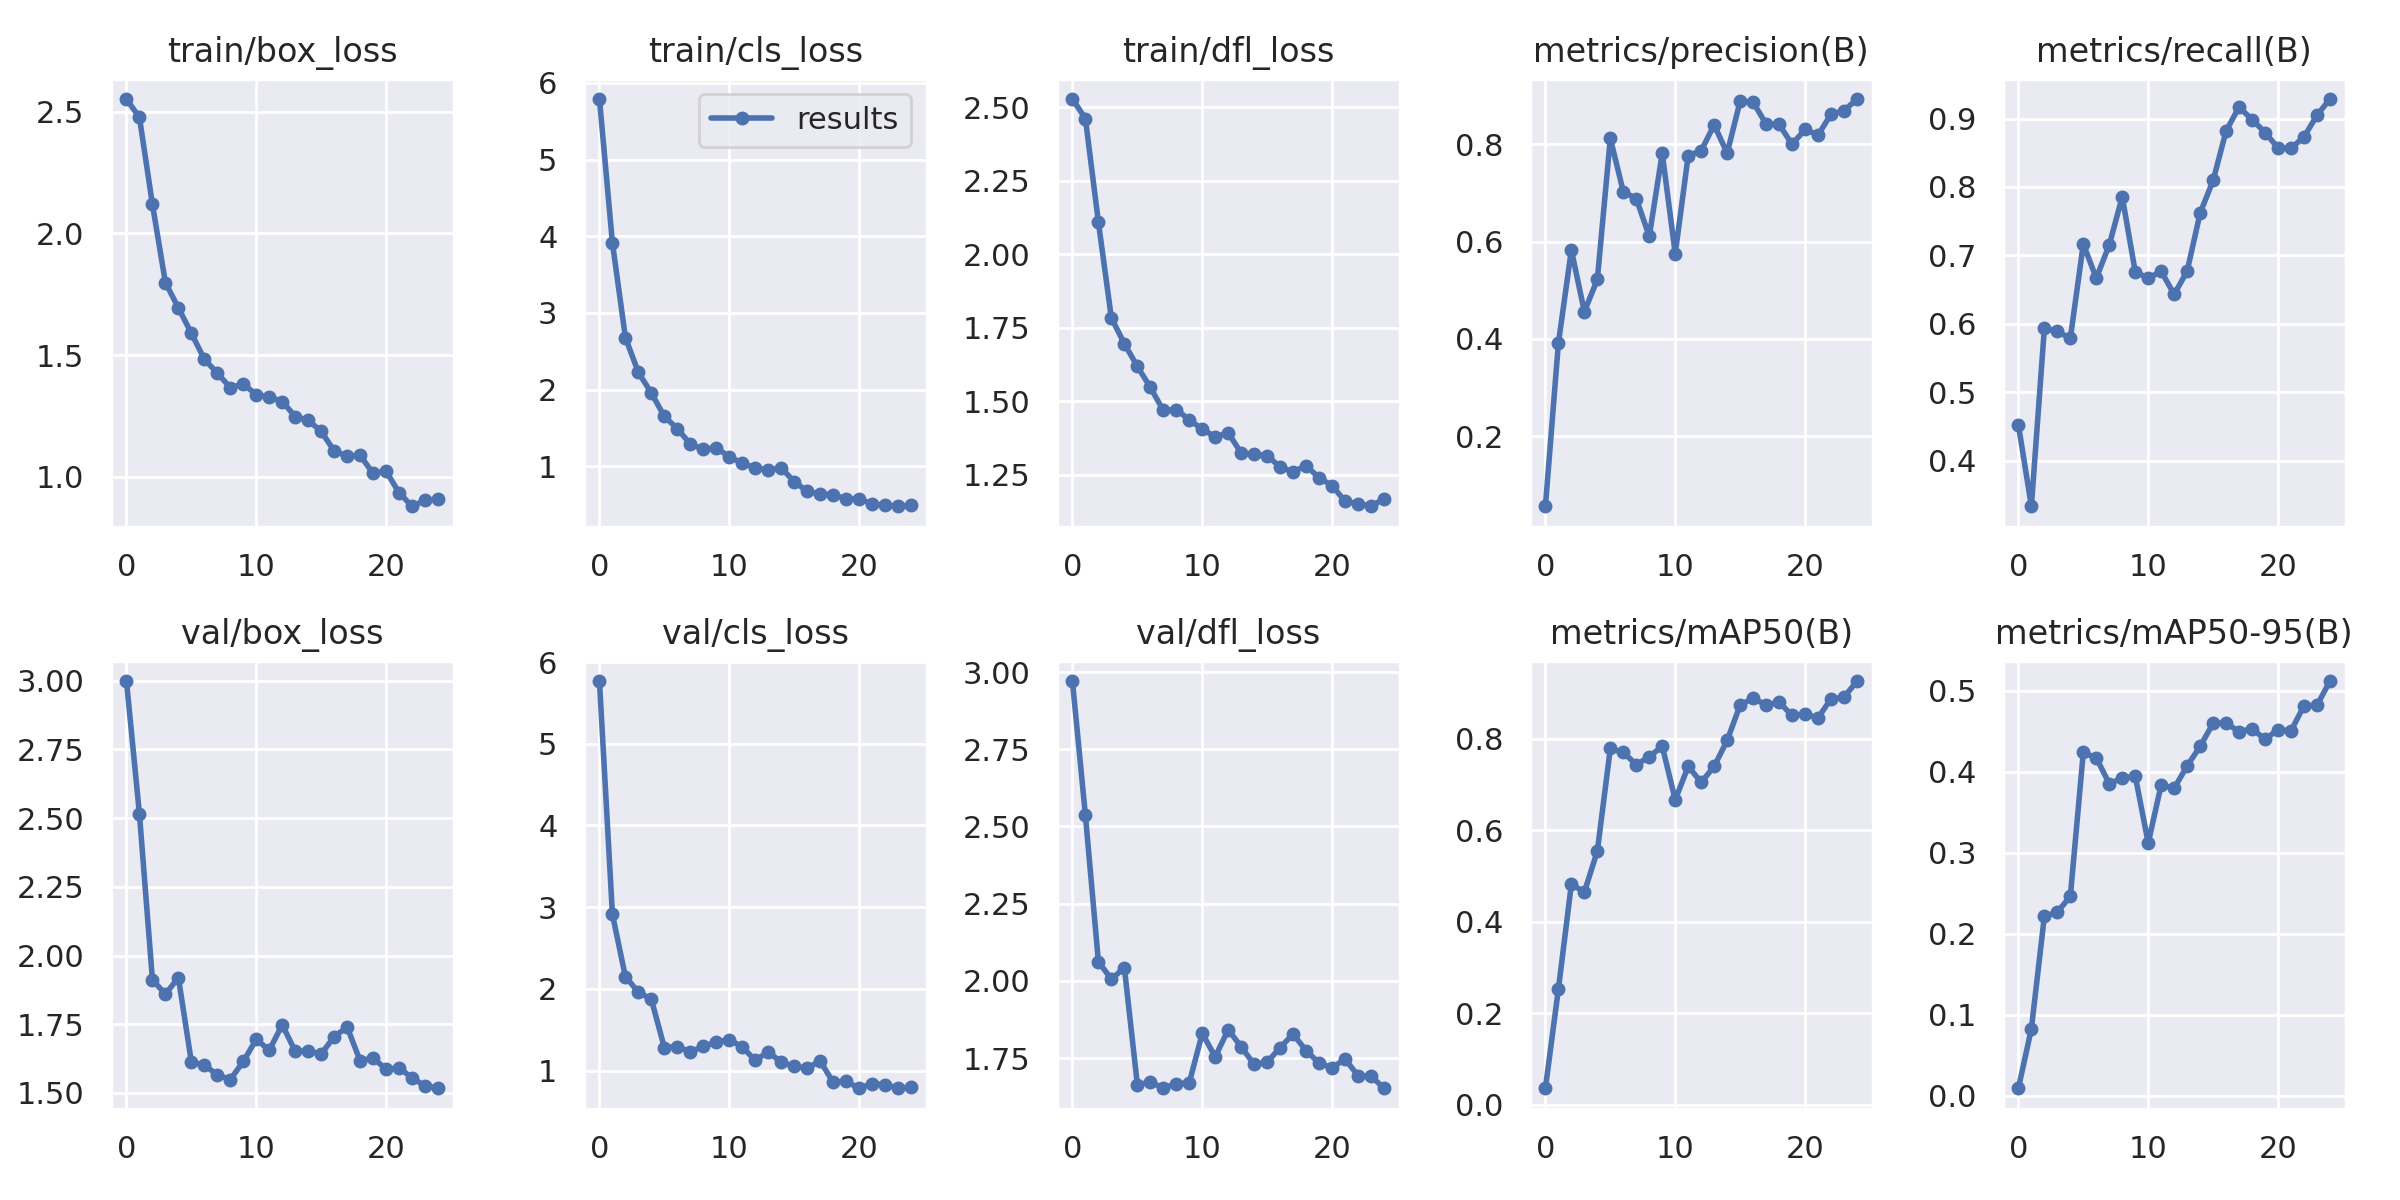

In [14]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

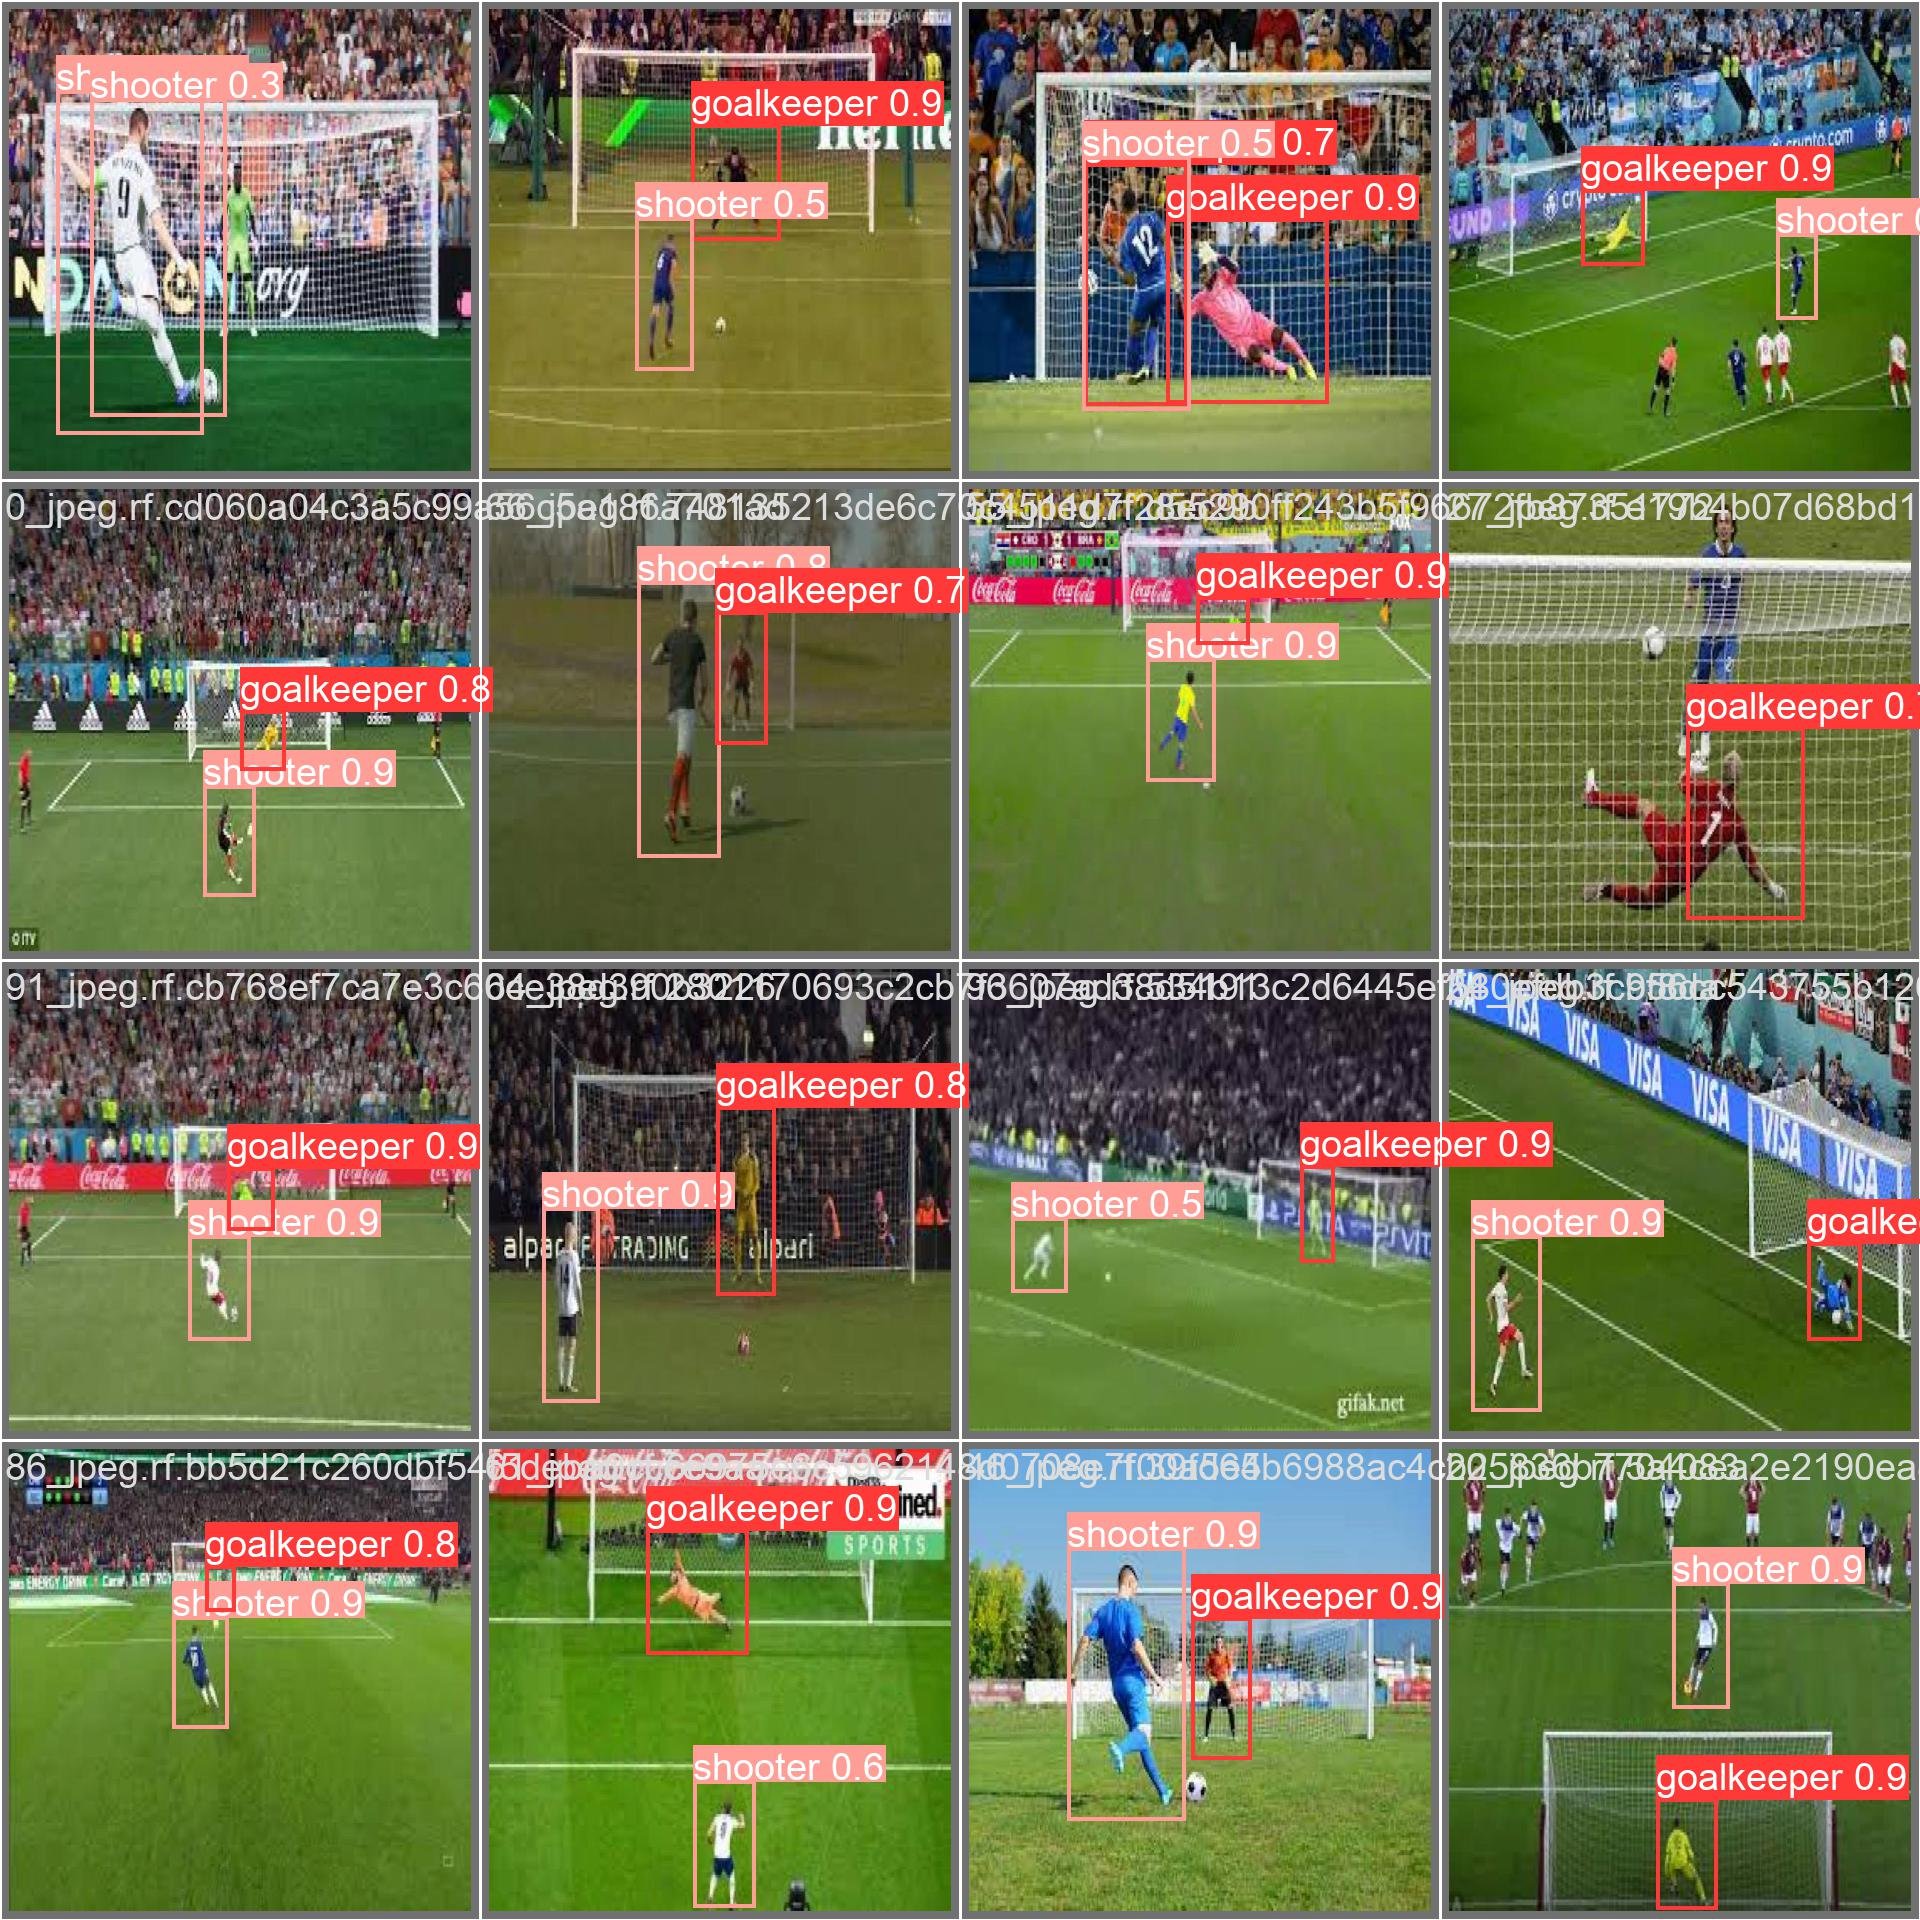

In [15]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

# **VALIDATION SET**

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.25 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/penalty-kick-2/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.75it/s]
                   all         21         42      0.935      0.898      0.938      0.524
            goalkeeper         21         21      0.949      0.892      0.957      0.459
               shooter         21         21      0.921      0.905      0.919       0.59
Speed: 0.2ms pre-process, 14.4ms inference, 0.0ms loss, 1.3ms post-process per image


# **REAL TEST ON VIDEO**

In [20]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov

Ultralytics YOLOv8.0.25 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 14.4ms
video 1/1 (2/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 11.6ms
video 1/1 (3/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 11.5ms
video 1/1 (4/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 11.5ms
video 1/1 (5/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 11.5ms
video 1/1 (6/208) /content/[PK戦]帝京長岡旭川実業[大会史上最長]2019年1月2日第97回全国高等学校サッカー選手権大会[2回戦].mp4_020.mov: 384x640 1 goalkeeper, 1 shooter, 11.5ms
video 1/1 (7/208) /co

Note: Grab first frame of each of the videos to identify rather than the whole video, possibly more efficient and accurate